In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from google.colab import files

# upload kaggle API key for downloading data (json format)
uploaded = files.upload()
for fn in uploaded.keys():
  print(f"File {fn} was uploaded")

# move kaggle.json into folder where API expects to find it
!mkdir -p ~/.kaggle && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
File kaggle.json was uploaded


In [3]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data
!unzip breast-cancer-wisconsin-data.zip

import pandas as pd
data= pd.read_csv('data.csv')
data.head()

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
breast-cancer-wisconsin-data.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  breast-cancer-wisconsin-data.zip
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#Import libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


#**Exploratory Data Analysis  (EDA)**

In [8]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
#understanding Data size
# we have 569 rows and 33 columns
data.shape

(569, 33)

In [10]:
#Data type
#great almost all dataset is numerical
data.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


In [11]:
# check missing values
# no missing values that is good
data.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [12]:
data.isnull().mean()*100

,0
id,0.0
diagnosis,0.0
radius_mean,0.0
texture_mean,0.0
perimeter_mean,0.0
area_mean,0.0
smoothness_mean,0.0
compactness_mean,0.0
concavity_mean,0.0
concave points_mean,0.0


In [13]:
#Statics Overview of Dataset
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [14]:
# check for duplicate
data.duplicated().sum()

0

This dataset awesome to work on , cuz it not suffering from any  comman problems

In [24]:
df=data.drop(['Unnamed: 32','id'],axis=1, inplace=True)


In [34]:
# unique  values in Target_classs
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [42]:
df_filter=df['diagnosis'].value_counts()
df_filter

,count
diagnosis,
B,357
M,212


<Axes: xlabel='diagnosis'>

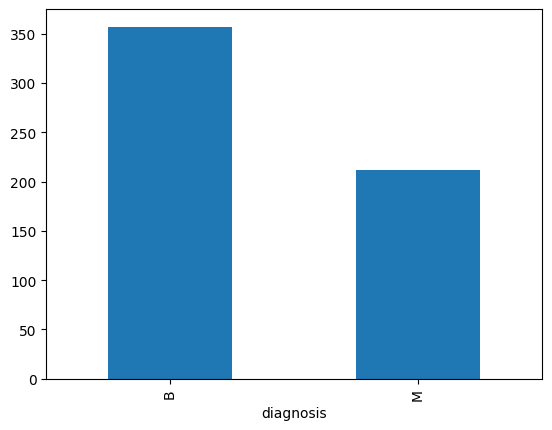

In [43]:
df_filter.plot(kind='bar')

In [ ]:
df_filter=df.drop(['diagnosis'],axis=1, inplace=True)

In [48]:
print(df.columns)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


#Analysis dataset

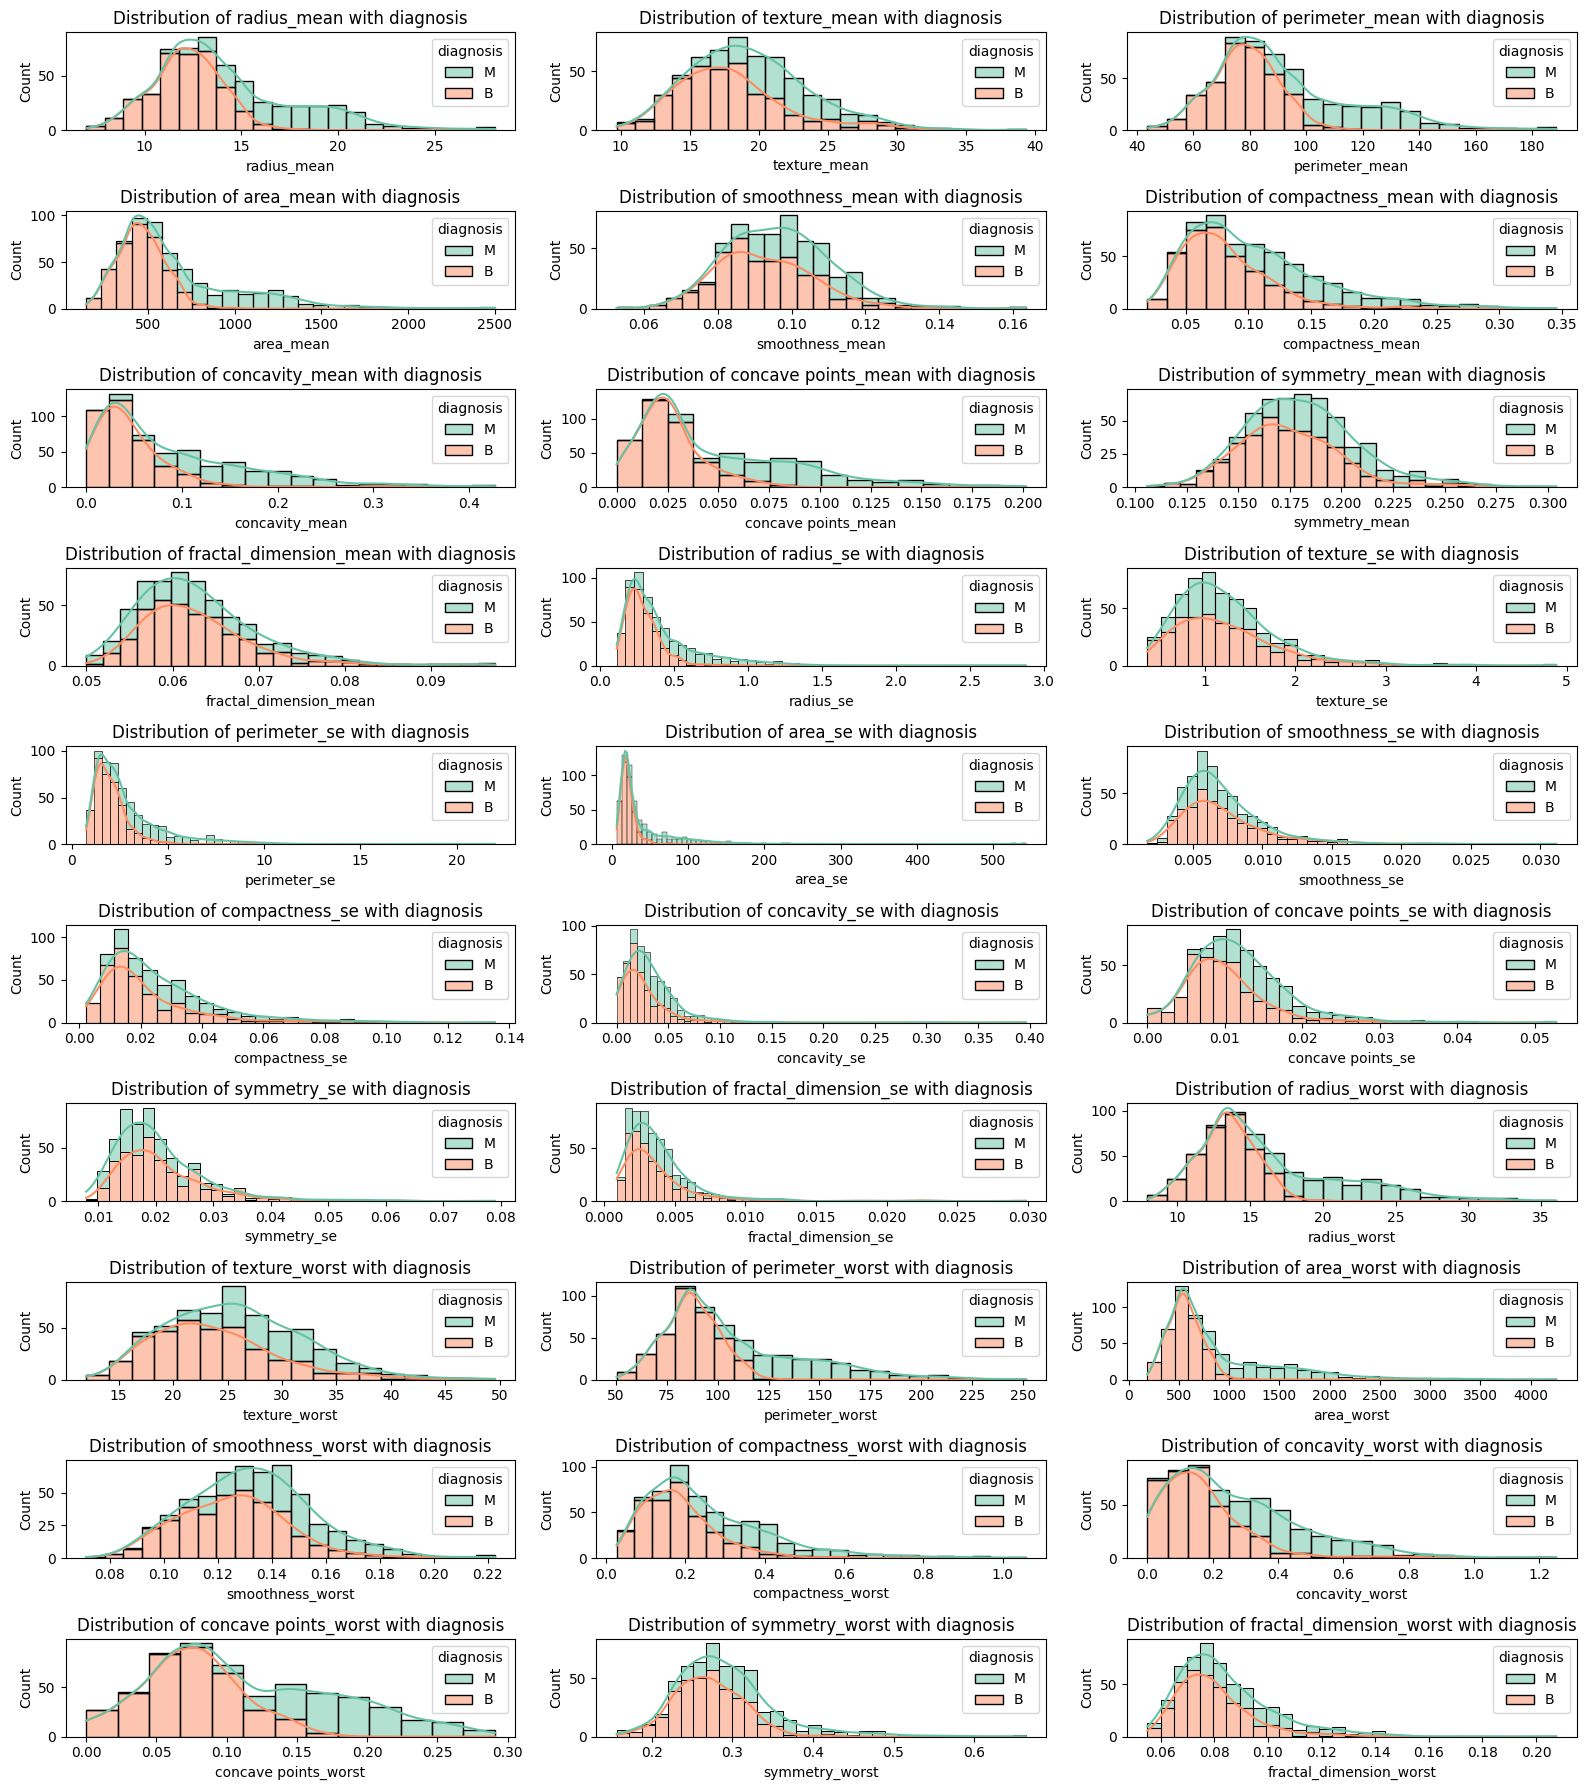

In [55]:
hue = 'diagnosis'

plt.figure(figsize=(16, 18))

rows = (len(data.drop(hue, axis=1).columns) + 2) // 3

for i, col in enumerate(data.drop(hue, axis=1).columns, 1):

    plt.subplot(rows, 3, i)

    sns.histplot(data, x=col, hue=hue, palette="Set2", multiple="stack", kde=True)

    plt.title(f'Distribution of {col} with {hue}')

    plt.xlabel(col)

    plt.ylabel('Count')

plt.tight_layout()

plt.show()

this data suffring by skewed

Outliers in 'radius_mean':
     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
82          M        25.22         24.91           171.5     1878.0   
108         M        22.27         19.67           152.8     1509.0   
122         M        24.25         20.20           166.2     1761.0   
164         M        23.27         22.04           152.1     1686.0   
180         M        27.22         21.87           182.1     2250.0   
202         M        23.29         26.67           158.9     1685.0   
212         M        28.11         18.47           188.5     2499.0   
236         M        23.21         26.97           153.5     1670.0   
339         M        23.51         24.27           155.1     1747.0   
352         M        25.73         17.46           174.2     2010.0   
369         M        22.01         21.90           147.2     1482.0   
461         M        27.42         26.27           186.9     2501.0   
503         M        23.09         19.83         

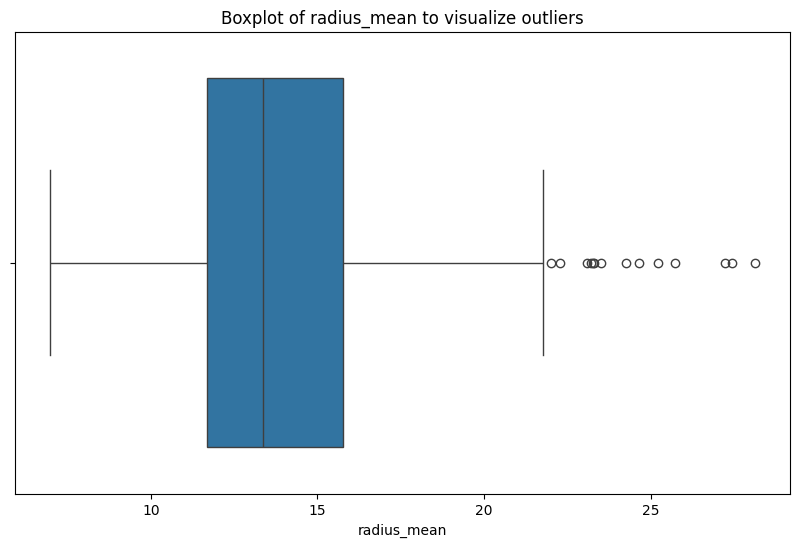

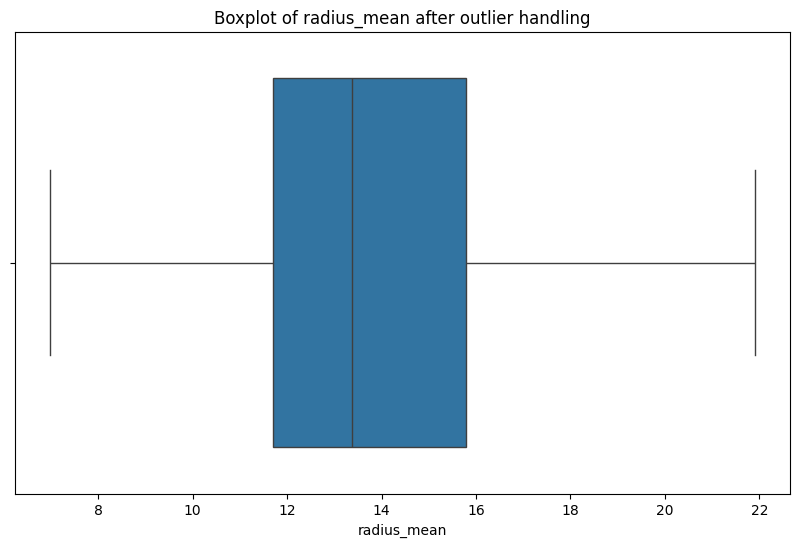

In [56]:
# Outlier detection using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Example usage for 'radius_mean' column
outliers_radius_mean = detect_outliers_iqr(data, 'radius_mean')
print("Outliers in 'radius_mean':\n", outliers_radius_mean)


#Visualization of outliers
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='radius_mean', data=data)
plt.title('Boxplot of radius_mean to visualize outliers')
plt.show()


#Handling outliers (example: replacing with bounds)
def handle_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    return data

data = handle_outliers_iqr(data, 'radius_mean')

#Verify the change after handling outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='radius_mean', data=data)
plt.title('Boxplot of radius_mean after outlier handling')
plt.show()

#Data preprocessing  

In [58]:
#handling categorical  target dataset
# M ==> 1
# B ==> 0
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data['diagnosis']=le.fit_transform(data['diagnosis'])
data.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [59]:
data['diagnosis'].unique()

array([1, 0])

In [60]:
# train and test split
x=data.drop('diagnosis',axis=1)
y=data['diagnosis']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#Feature Engineering

In [61]:
#features Scaling
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [63]:
x_train.shape, x_test.shape

((455, 30), (114, 30))

In [64]:
scaler = StandardScaler()

x_train = pd.DataFrame(data=scaler.fit_transform(x_train), columns=x.columns)

x_test = pd.DataFrame(data=scaler.transform(x_test), columns=x.columns)

#Modeling

LinearRegression





In [79]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [80]:
y_pred = lr.predict(x_test)
accuracy = lr.score(x_test, y_test)
print(f"Accuracy of Linear Regression: {accuracy}")

Accuracy of Linear Regression: 0.7183117821912558


LogisticRegression


In [81]:
LR = LogisticRegression(random_state=42)
LR.fit(x_train, y_train)

LogisticRegression(random_state=42)

train accuracy: 0.9868131868131869
train f1_score: 0.9821428571428571


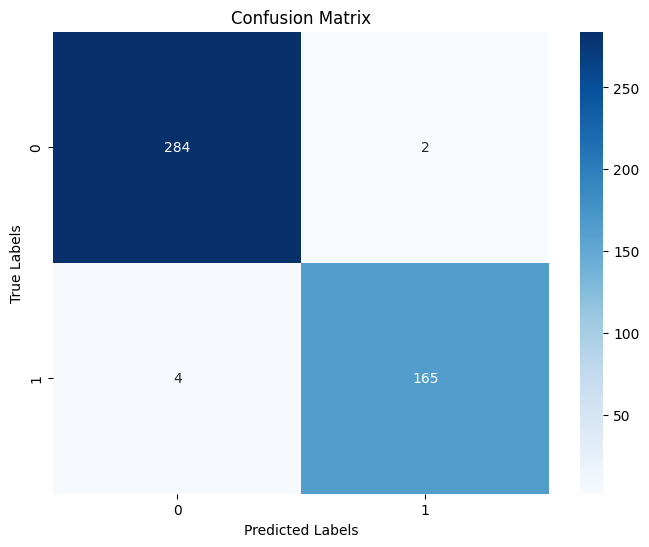

In [82]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
y_pred_train = LR.predict(x_train)




train_acc = accuracy_score(y_true=y_train, y_pred=y_pred_train)

train_f1 = f1_score(y_true=y_train, y_pred=y_pred_train, average='binary')



print('train accuracy: {}'.format(train_acc))

print('train f1_score: {}'.format(train_f1))



train_cm = confusion_matrix(y_true=y_train, y_pred=y_pred_train)



plt.figure(figsize=(8, 6))  # Set the figure size



sns.heatmap(train_cm, annot=True, fmt='.0f', cmap='Blues', cbar=True, xticklabels=['0', '1'], yticklabels=['0', '1'])



plt.title('Confusion Matrix')



plt.xlabel('Predicted Labels')



plt.ylabel('True Labels')



plt.show()

In [83]:
#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

train accuracy: 0.9802197802197802
train f1_score: 0.9726443768996961


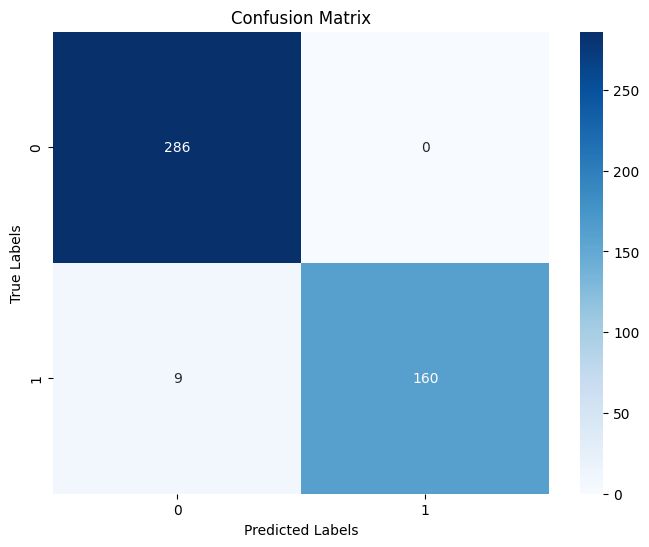

In [84]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
y_pred_train = knn.predict(x_train)




train_acc = accuracy_score(y_true=y_train, y_pred=y_pred_train)

train_f1 = f1_score(y_true=y_train, y_pred=y_pred_train, average='binary')



print('train accuracy: {}'.format(train_acc))

print('train f1_score: {}'.format(train_f1))



train_cm = confusion_matrix(y_true=y_train, y_pred=y_pred_train)



plt.figure(figsize=(8, 6))  # Set the figure size



sns.heatmap(train_cm, annot=True, fmt='.0f', cmap='Blues', cbar=True, xticklabels=['0', '1'], yticklabels=['0', '1'])



plt.title('Confusion Matrix')



plt.xlabel('Predicted Labels')



plt.ylabel('True Labels')



plt.show()

In [85]:
#decision tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

train accuracy: 1.0
train f1_score: 1.0


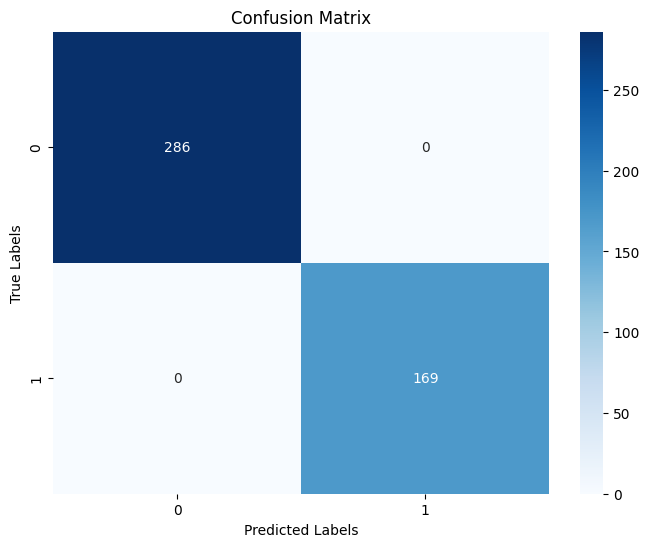

In [86]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
y_pred_train = dt.predict(x_train)




train_acc = accuracy_score(y_true=y_train, y_pred=y_pred_train)

train_f1 = f1_score(y_true=y_train, y_pred=y_pred_train, average='binary')



print('train accuracy: {}'.format(train_acc))

print('train f1_score: {}'.format(train_f1))



train_cm = confusion_matrix(y_true=y_train, y_pred=y_pred_train)



plt.figure(figsize=(8, 6))  # Set the figure size



sns.heatmap(train_cm, annot=True, fmt='.0f', cmap='Blues', cbar=True, xticklabels=['0', '1'], yticklabels=['0', '1'])



plt.title('Confusion Matrix')



plt.xlabel('Predicted Labels')



plt.ylabel('True Labels')



plt.show()

Random Forest Classifier

In [87]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

train accuracy: 1.0
train f1_score: 1.0


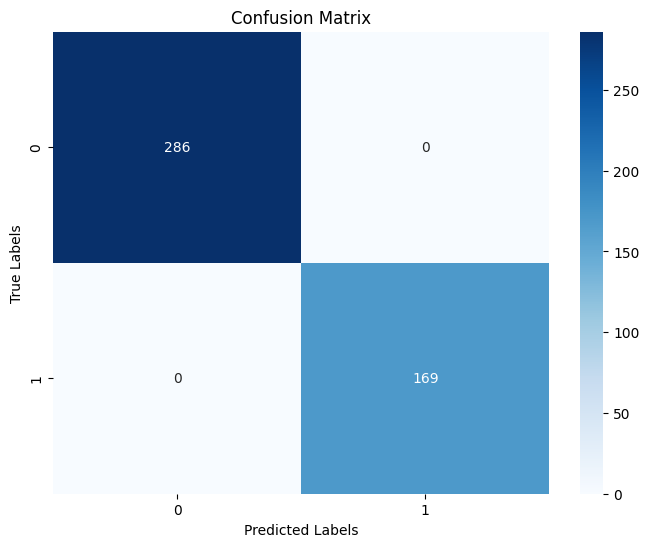

In [88]:
y_pred_train = rf.predict(x_train)

train_acc = accuracy_score(y_true=y_train, y_pred=y_pred_train)

train_f1 = f1_score(y_true=y_train, y_pred=y_pred_train, average='binary')



print('train accuracy: {}'.format(train_acc))

print('train f1_score: {}'.format(train_f1))



train_cm = confusion_matrix(y_true=y_train, y_pred=y_pred_train)



plt.figure(figsize=(8, 6))  # Set the figure size



sns.heatmap(train_cm, annot=True, fmt='.0f', cmap='Blues', cbar=True, xticklabels=['0', '1'], yticklabels=['0', '1'])



plt.title('Confusion Matrix')



plt.xlabel('Predicted Labels')



plt.ylabel('True Labels')



plt.show()

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



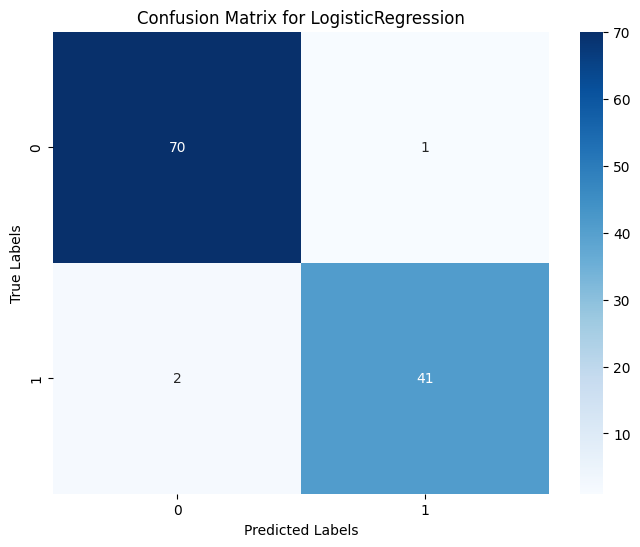

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



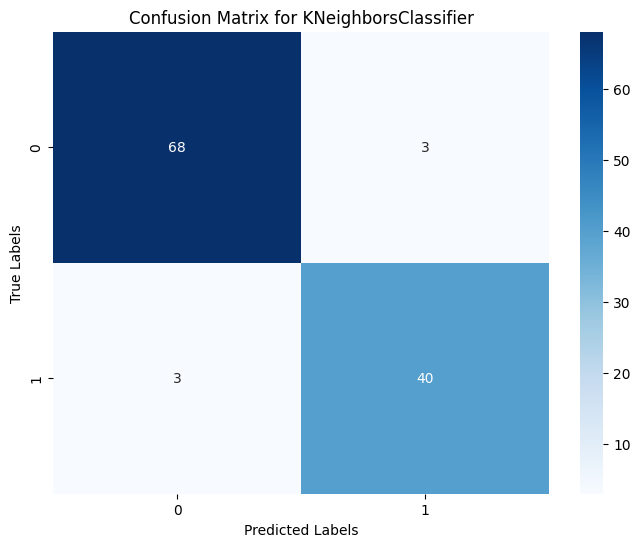

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



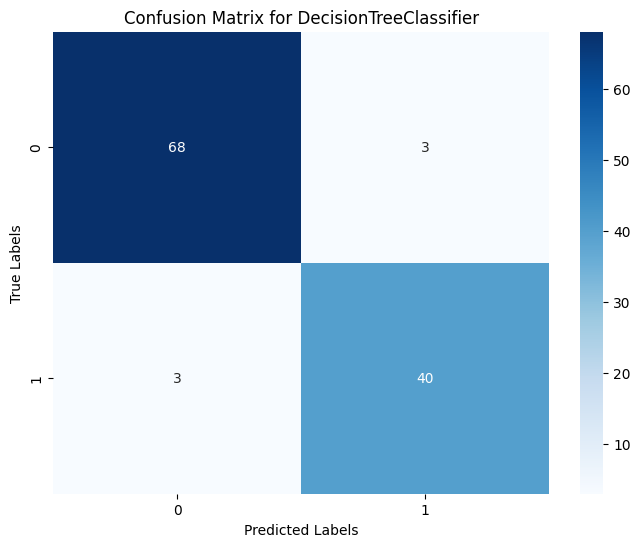

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



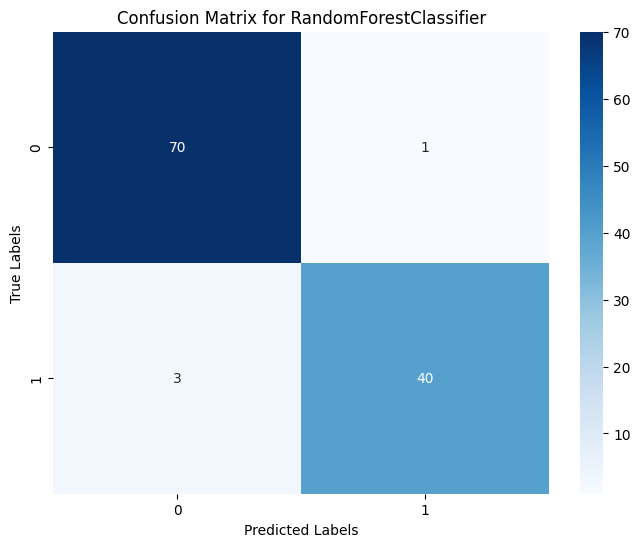

In [95]:
from sklearn.metrics import classification_report

def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {type(model).__name__}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    return y_pred


# Logistic Regression
y_pred_lr = evaluate_model(LR, x_test, y_test)


# KNN
y_pred_knn = evaluate_model(knn, x_test, y_test)


# Decision Tree
y_pred_dt = evaluate_model(dt, x_test, y_test)


# Random Forest
y_pred_rf = evaluate_model(rf, x_test, y_test)

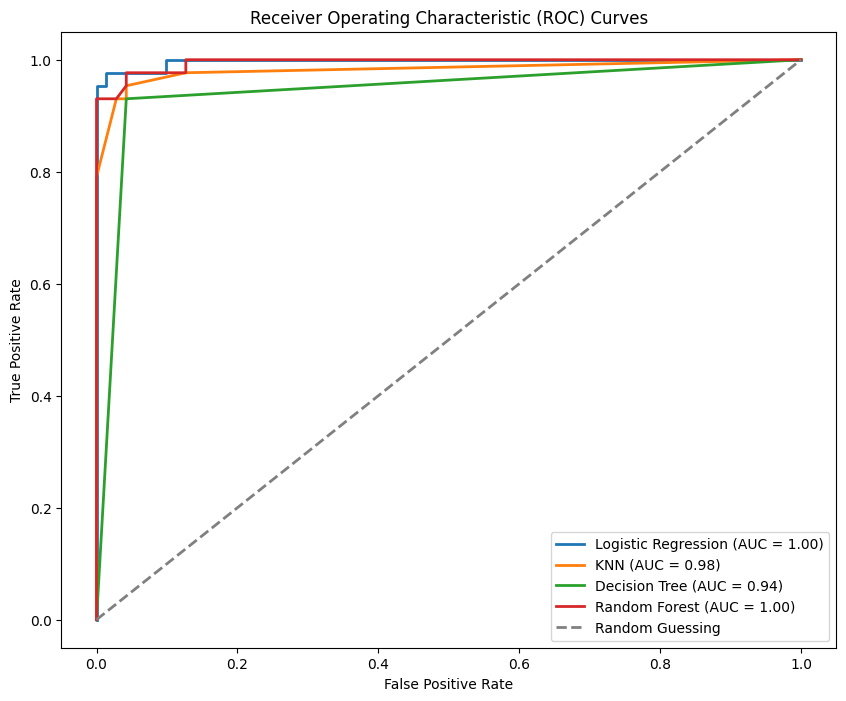

In [103]:
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curves
def plot_roc_curve(models, x_test, y_test):
    plt.figure(figsize=(10, 8))
    for name, model in models.items():
        y_pred_proba = model.predict_proba(x_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', label='Random Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc='lower right')
    plt.show()


# Create a dictionary of models
models = {
    'Logistic Regression': LR,
    'KNN': knn,
    'Decision Tree': dt,
    'Random Forest': rf
}

# Plot ROC curves
plot_roc_curve(models, x_test, y_test)